In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr
from  io import StringIO
import matplotlib.image as mpimg
from sklearn import tree

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from fbprophet import Prophet
from neuralprophet import NeuralProphet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
import pickle

# Machine learning

import tensorflow as tf
import pydotplus
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


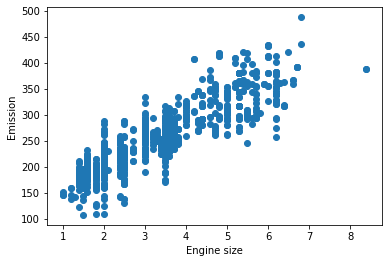

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

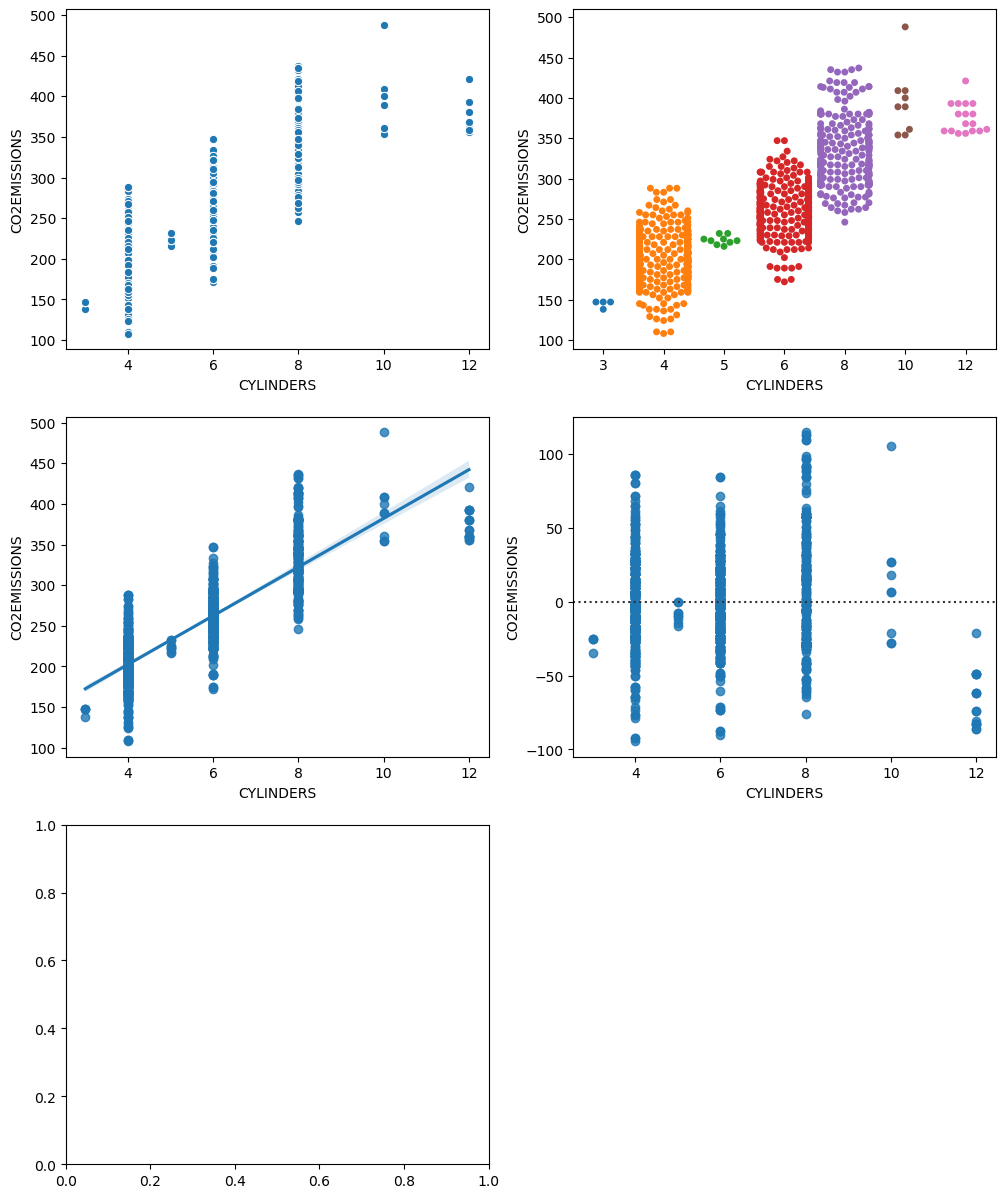

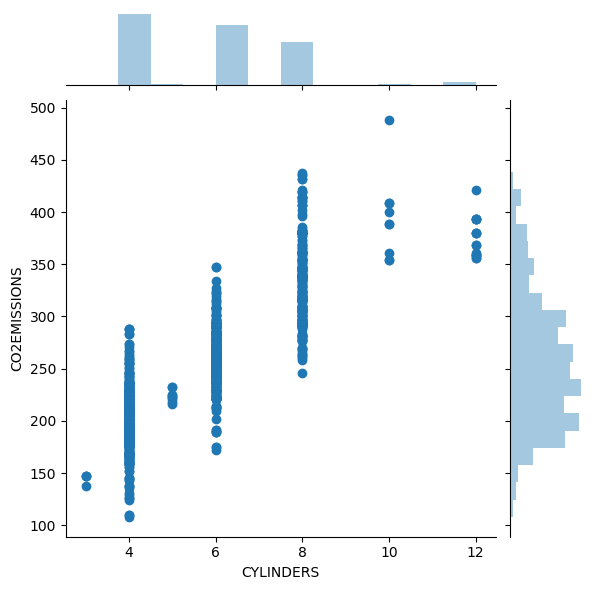

In [19]:
plt.style.use('default')

plt.figure(figsize=(12,15))

plt.subplot(3,2,1)
sns.scatterplot(cdf.CYLINDERS,cdf.CO2EMISSIONS)

plt.subplot(3,2,2)
sns.swarmplot(x=cdf.CYLINDERS,y=cdf.CO2EMISSIONS)

plt.subplot(3,2,3)
sns.regplot(cdf.CYLINDERS,cdf.CO2EMISSIONS)

plt.subplot(3,2,4)
sns.residplot(cdf.CYLINDERS,cdf.CO2EMISSIONS)

plt.subplot(3,2,5)
sns.jointplot(cdf.CYLINDERS,cdf.CO2EMISSIONS)

plt.show()

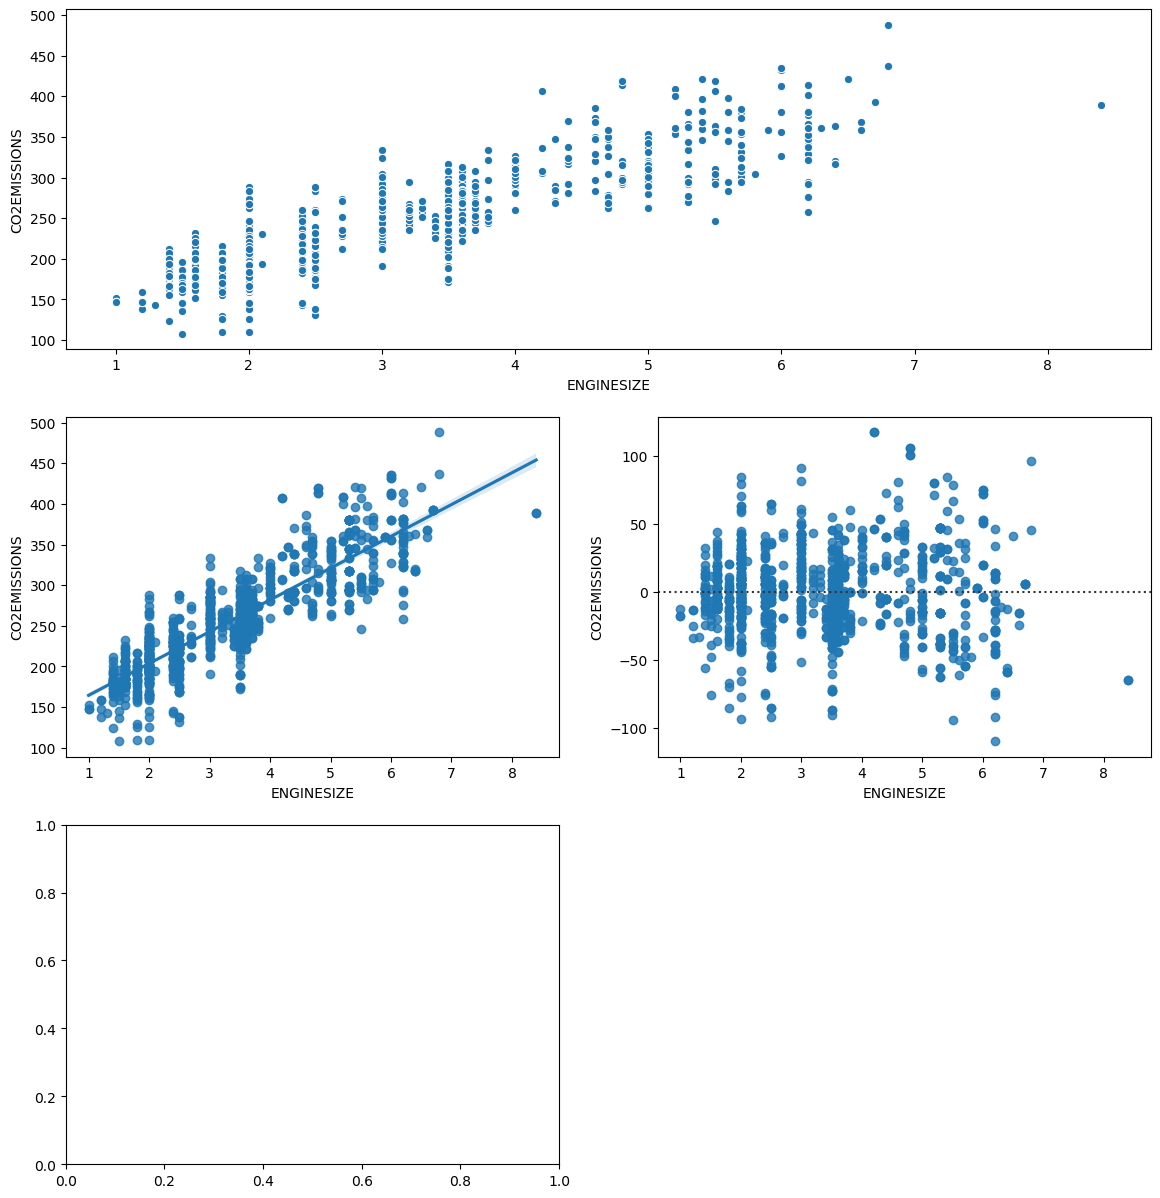

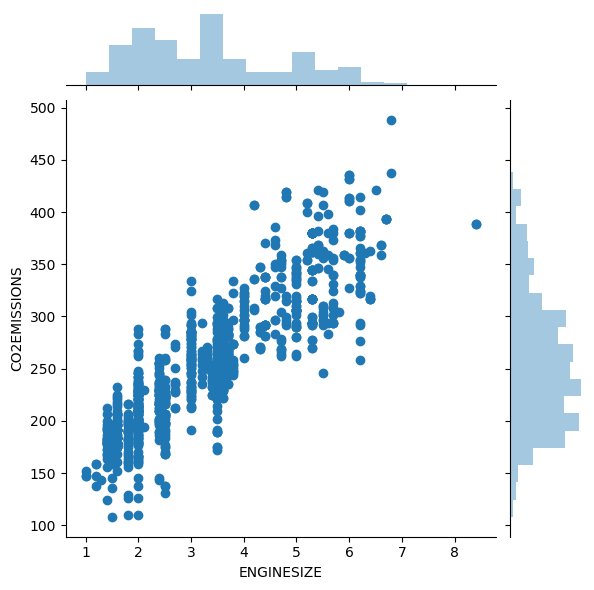

In [33]:
plt.style.use('default')

plt.figure(figsize=(14,15))

plt.subplot(3,2,(1,2))
sns.scatterplot(cdf.ENGINESIZE,cdf.CO2EMISSIONS)

plt.subplot(3,2,3)
sns.regplot(cdf.ENGINESIZE,cdf.CO2EMISSIONS)

plt.subplot(3,2,4)
sns.residplot(cdf.ENGINESIZE,cdf.CO2EMISSIONS)

plt.subplot(3,2,5)
sns.jointplot(cdf.ENGINESIZE,cdf.CO2EMISSIONS)

plt.show()

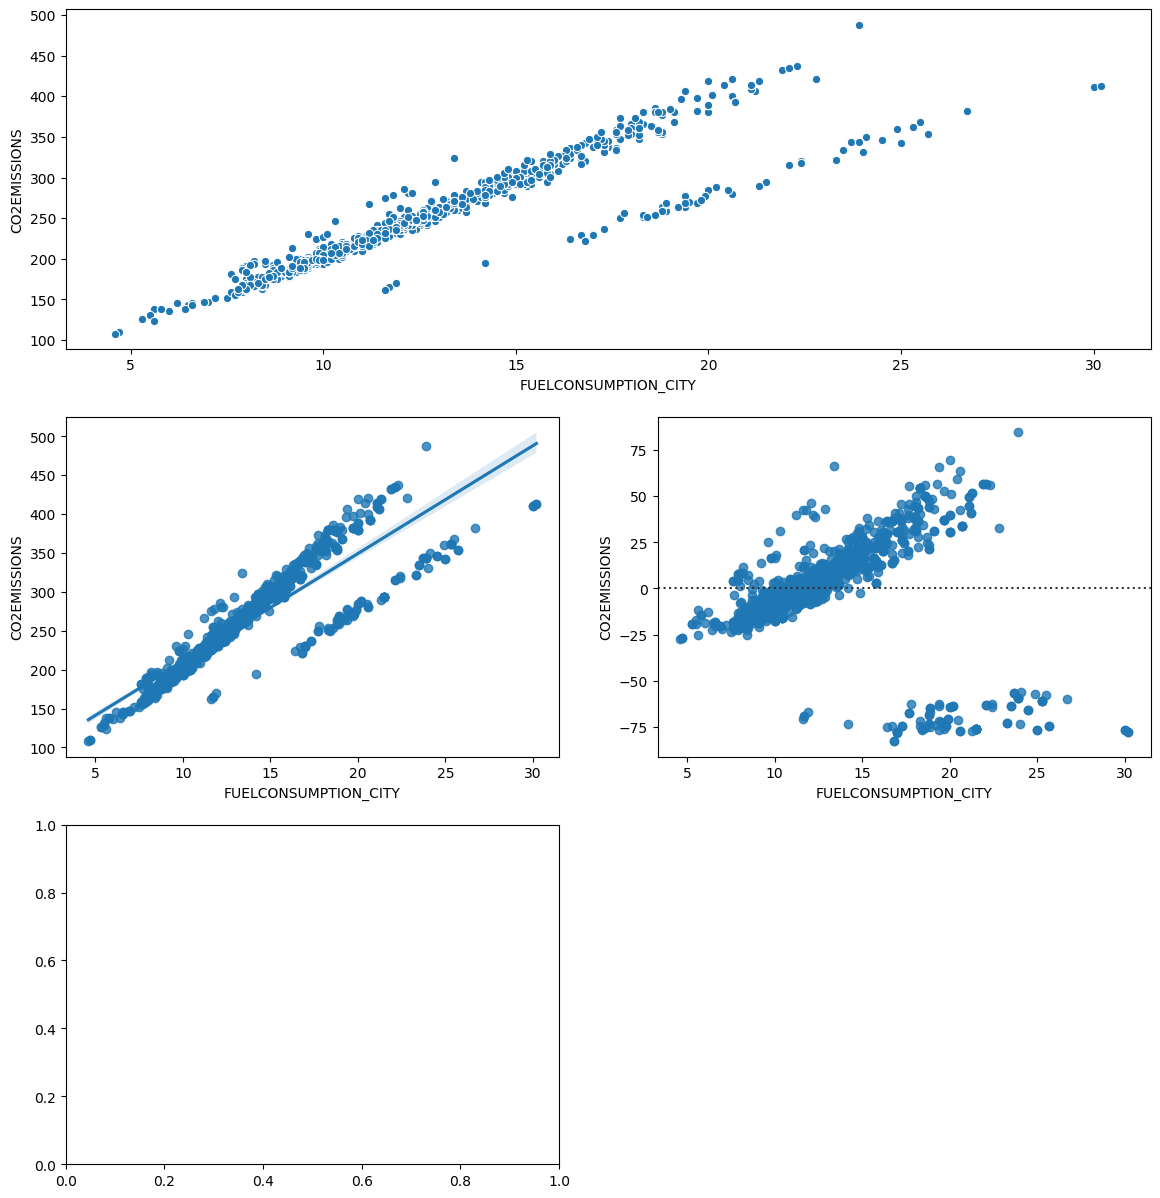

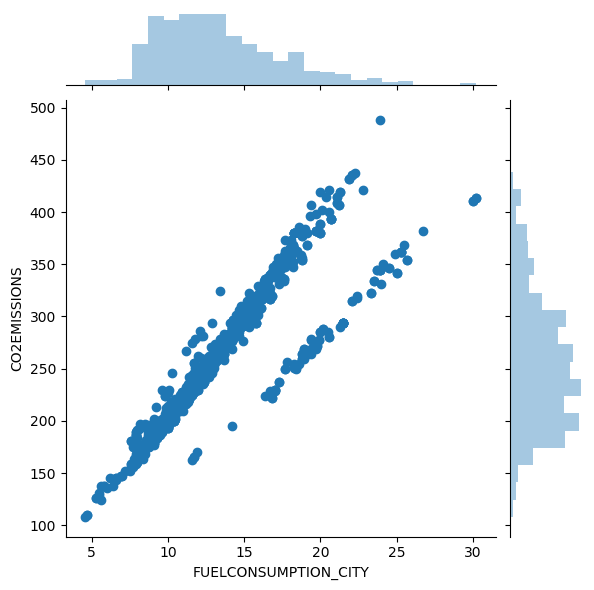

In [32]:
plt.style.use('default')

plt.figure(figsize=(14,15))

plt.subplot(3,2,(1,2))
sns.scatterplot(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)

plt.subplot(3,2,3)
sns.regplot(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)

plt.subplot(3,2,4)
sns.residplot(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)

plt.subplot(3,2,5)
sns.jointplot(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)

plt.show()

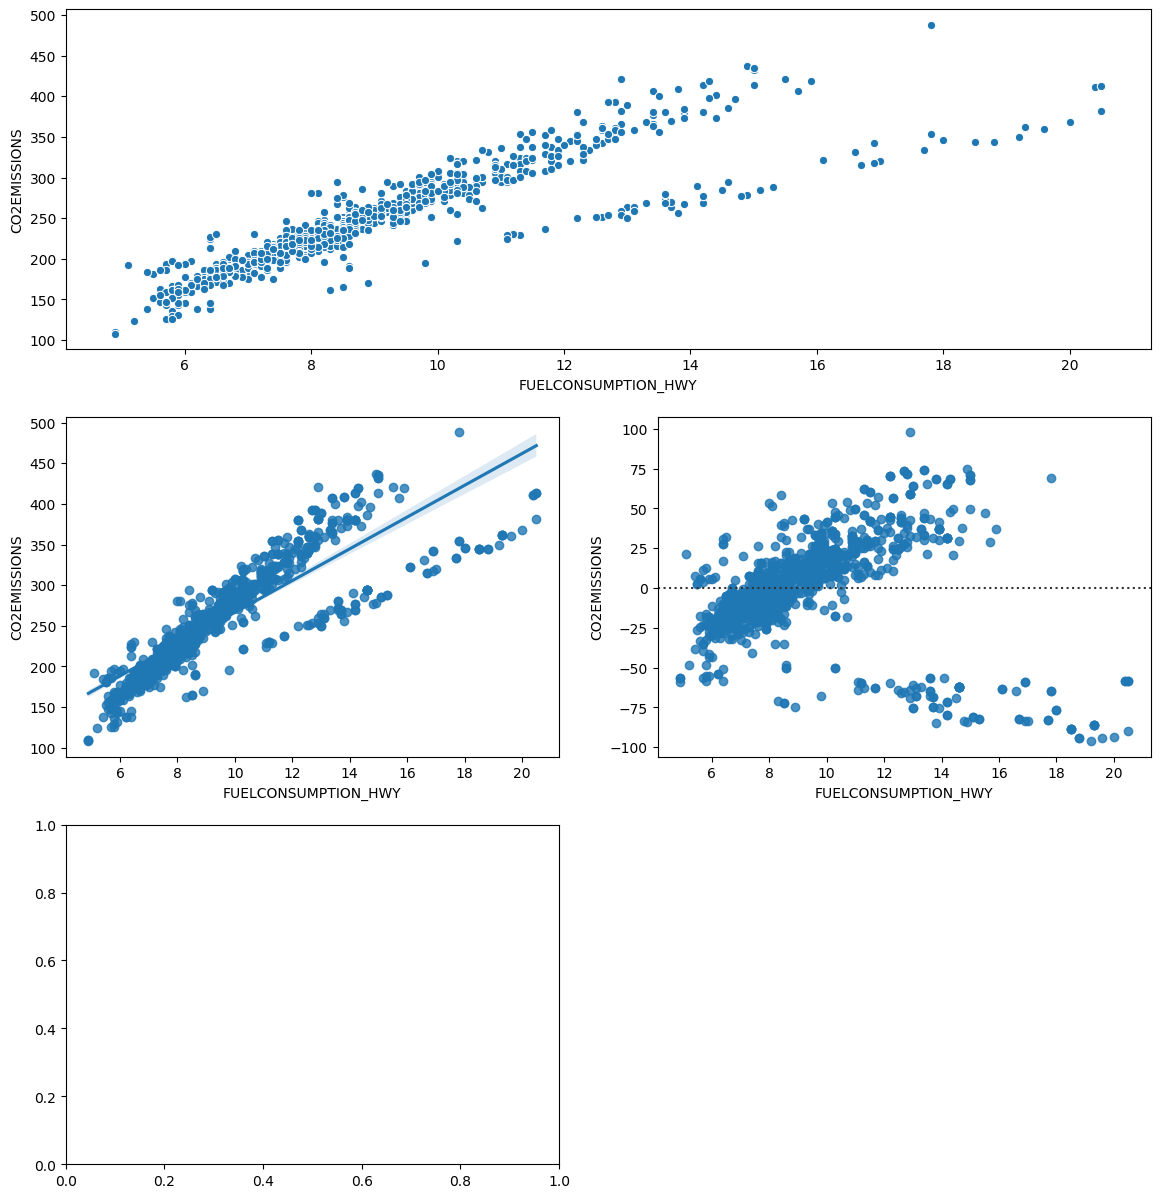

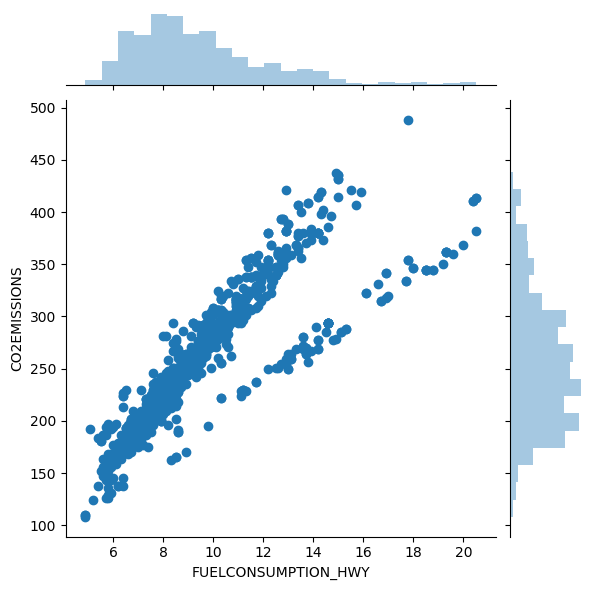

In [31]:
plt.style.use('default')

plt.figure(figsize=(14,15))

plt.subplot(3,2,(1,2))
sns.scatterplot(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)

plt.subplot(3,2,3)
sns.regplot(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)

plt.subplot(3,2,4)
sns.residplot(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)

plt.subplot(3,2,5)
sns.jointplot(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS)

plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [9]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[9.94298562 7.76365208 9.98276835]]


In [10]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 532.38
Variance score: 0.85


In [11]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[10.00739454  7.30816044  6.67941208  2.93969124]]
Residual sum of squares: 534.46
Variance score: 0.85
